In [ ]:
from google.colab import drive
import os
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#@title Run on TensorFlow 2.x
%tensorflow_version 2.x
from __future__ import absolute_import, division, print_function, unicode_literals

In [ ]:
#@title Import relevant modules
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import datasets,layers, models
from matplotlib import pyplot as plt

# The following lines adjust the granularity of reporting. 
pd.options.display.max_rows = 10
pd.options.display.float_format = "{:.1f}".format

# The following line improves formatting when ouputting NumPy arrays.
np.set_printoptions(linewidth = 200)

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/MachineLearning/preprocess_data.csv")

In [ ]:
df

,text,tag
0,tuyến metro số 2 bến thành tham lương hẹn khởi...,thoi-su
1,dự_báo thời_tiết 76 bắc_bộ tiếp_tục mưa_giông ...,thoi-su
2,nữ tài_xế đang mang thai bị hành_hung ở hà_nội...,thoi-su
3,ông nguyễn_thanh_long bị cách_chức bộ_trưởng y...,thoi-su
4,kỷ_luật cảnh_cáo nguyên giám_đốc ban quản_lý d...,thoi-su
...,...,...
47597,chợ long biên một trong những khu chợ_trời thú...,du-lich
47598,kỳ diệu dãy núi cầu_vồng độc_nhất thế_giới tạo...,du-lich
47599,lễ_hội hóa_trang độc_đáo ở thành_phố tình_yêu ...,du-lich
47600,hàng vạn khách du_lịch đổ về sa_pa sa_pa không...,du-lich


In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
onehot = OneHotEncoder(sparse=False)

onehot_encoded_newstype = onehot.fit_transform(df[["tag"]])
print(onehot_encoded_newstype)

[[0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [ ]:
onehot.categories_

[array(['bat-dong-san', 'cong-nghe', 'doi-song', 'du-lich', 'giai-tri', 'giao-duc', 'kinh-doanh', 'phap-luat', 'suc-khoe', 'the-gioi', 'the-thao', 'thoi-su', 'tuan-viet-nam'], dtype=object)]

In [ ]:
onehot_encoded_newstype

array([[0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
from pandas import Series

In [ ]:
 tag = pd.DataFrame(onehot_encoded_newstype)

In [ ]:
tag

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
47597,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
47598,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
47599,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
47600,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
text = pd.read_csv("/content/drive/MyDrive/MachineLearning/pretrain_final.csv")

In [ ]:
text

,0,1,2,3,4,5,6,7,8,9,...,758,759,760,761,762,763,764,765,766,767
0,-0.0,0.3,-0.2,-0.1,0.1,-0.0,-0.1,-0.0,0.0,-0.3,...,0.3,-0.0,0.3,-0.5,0.2,-0.2,-0.2,0.3,0.2,-0.1
1,0.1,0.0,-0.0,-0.2,0.3,0.3,0.0,-0.1,-0.0,-0.1,...,0.4,-0.2,0.0,-0.3,0.4,0.1,-0.0,0.1,0.0,0.0
2,0.4,-0.2,0.0,-0.3,0.1,0.2,-0.0,-0.2,-0.1,-0.3,...,0.0,0.0,0.2,-0.4,-0.2,0.1,0.1,0.0,0.1,0.2
3,-0.1,0.2,0.1,-0.2,0.2,0.1,0.2,0.0,-0.3,-0.4,...,0.3,-0.1,0.1,-0.5,0.3,0.2,0.0,0.0,-0.1,0.2
4,-0.0,0.0,0.0,-0.1,0.0,0.3,0.1,0.0,0.1,-0.5,...,0.3,-0.2,0.2,-0.3,0.3,-0.0,-0.3,0.2,0.1,0.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47597,0.4,0.0,-0.1,-0.3,0.1,-0.1,-0.0,-0.1,0.1,-0.1,...,0.1,-0.0,0.0,-0.5,0.2,-0.2,0.2,0.0,0.2,0.1
47598,-0.0,0.4,-0.2,-0.5,0.0,0.1,0.1,-0.3,-0.2,-0.3,...,-0.0,-0.1,-0.1,-0.3,0.3,-0.2,-0.2,0.2,-0.1,0.0
47599,0.1,0.1,0.1,-0.2,0.1,0.3,0.3,-0.2,0.2,0.0,...,0.4,0.0,-0.0,-0.1,0.0,-0.3,0.2,0.0,0.1,0.1
47600,0.2,0.0,0.2,-0.4,0.1,0.1,0.0,0.0,-0.1,0.1,...,0.4,0.0,0.1,-0.2,0.1,-0.2,0.1,0.3,-0.1,-0.2


In [ ]:
text.iloc[0][0]

-0.034098767

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
test_percent = 0.2

In [ ]:
text_train, text_test, tag_train, tag_test = train_test_split(text, tag, test_size=test_percent, random_state=13)

In [ ]:
model = models.Sequential()


In [ ]:
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dropout(.1, ))
model.add(layers.Dense(1024, activation='relu'))
model.add(layers.Dropout(.1, ))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(.1, ))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dropout(.1, ))
model.add(layers.Dense(13, activation='softmax'))

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(text_train, tag_train, epochs=10, validation_data=(text_test, tag_test))

Epoch 1/10


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


1187/1191 [============================>.] - ETA: 0s - loss: 0.9823 - accuracy: 0.6967

/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


1191/1191 [==============================] - 16s 13ms/step - loss: 0.9823 - accuracy: 0.6968 - val_loss: 0.7278 - val_accuracy: 0.7727
Epoch 2/10
1191/1191 [==============================] - 15s 13ms/step - loss: 0.7208 - accuracy: 0.7800 - val_loss: 0.6984 - val_accuracy: 0.7804
Epoch 3/10
1191/1191 [==============================] - 16s 13ms/step - loss: 0.6325 - accuracy: 0.8053 - val_loss: 0.6919 - val_accuracy: 0.7848
Epoch 4/10
1191/1191 [==============================] - 20s 16ms/step - loss: 0.5698 - accuracy: 0.8219 - val_loss: 0.6499 - val_accuracy: 0.7991
Epoch 5/10
1191/1191 [==============================] - 19s 16ms/step - loss: 0.5175 - accuracy: 0.8344 - val_loss: 0.6419 - val_accuracy: 0.8059
Epoch 6/10
1191/1191 [==============================] - 29s 24ms/step - loss: 0.4637 - accuracy: 0.8500 - val_loss: 0.6929 - val_accuracy: 0.7981
Epoch 7/10
1191/1191 [==============================] - 20s 16ms/step - loss: 0.4209 - accuracy: 0.8605 - val_loss: 0.6718 - val_accura

298/298 - 1s - loss: 0.7667 - accuracy: 0.7972 - 1s/epoch - 4ms/step


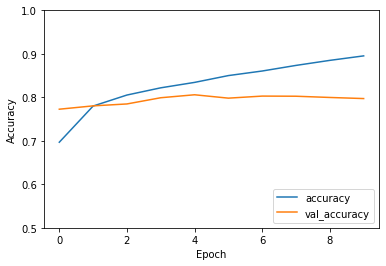

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(text_test,  tag_test, verbose=2)

In [ ]:
model.save("/content/drive/MyDrive/MachineLearning/my_model")

INFO:tensorflow:Assets written to: /content/drive/MyDrive/MachineLearning/my_model/assets


In [ ]:
reconstructed_model = tf.keras.models.load_model("/content/drive/MyDrive/MachineLearning/my_model")

In [ ]:
reconstructed_model.fit(text_test, tag_test)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


298/298 [==============================] - 4s 13ms/step - loss: 0.7246 - accuracy: 0.7870


In [ ]:
x = pd.DataFrame(text.iloc[0], )

TypeError: ignored

In [ ]:
x = pd.DataFrame.transpose(x)

In [ ]:
y = reconstructed_model.predict(x)

In [ ]:
y

array([[1.16575114e-01, 1.63782170e-04, 3.54658405e-05, 5.69126787e-05, 9.49063087e-06, 2.66790885e-05, 4.45405068e-03, 3.41449369e-04, 2.64131686e-05, 6.58490753e-05, 1.31454335e-05,
        8.73473287e-01, 4.75831237e-03]], dtype=float32)

In [ ]:
max = -1
for i in y[0]:
  if i>max:
    max = i
  else:
    i = 0

for i in y[0]:
  if i>max:
    max = i
  else:
    i = 0